<a href="https://colab.research.google.com/github/Inteli-College/2024-2A-T01-CC11-G04/blob/34-implementao-de-modelo-baseline---instrues-para-treinamento/notebooks/sprint2/Implementa%C3%A7%C3%A3o_de_Modelo_Baseline_Fun%C3%A7%C3%A3o_BoW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import unittest
import random
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from typing import List, Union, Dict, Tuple

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

Mounted at /content/drive


## Reading dataset

In [ ]:
# dataset_file_path = "preprocessed/data/path/file.xlsx"
dataset_file_path = "/content/drive/MyDrive/modulo11/processed_data.xlsx"
df_bow_vectors = pd.read_excel(dataset_file_path)
df_bow_vectors['processed_question'] = df_bow_vectors['processed_question'].fillna('')

In [ ]:
df_bow_vectors.head()

,intention,question,processed_question
0,Acesso a conta,Boa tarde\nPor gentileza alguém pode me ajudar...,"gentileza,alguém,ajudar,preciso,enviar,hj,dinh..."
1,Acesso a conta,Atualizei os site e agora como acessar minha c...,"atualizei,site,acessar,conta"
2,Acesso a conta,Boa tarde estou tendo problema com o pin\neu n...,"ter,problema,pin,lembro,senhar,pin,consigo,tro..."
3,Acesso a conta,E a senha\nNão me lembro,"senhar,lembro"
4,Acesso a conta,Eu não consigo entrar na conta,"consigo,entrar,conta"


## BoW

O Bag of Words (BoW) é uma técnica de representação textual que transforma um texto em um vetor baseado na frequência de palavras, sem considerar a ordem ou o contexto das palavras. <br><br> No treinamento de um modelo de classificação de intenções para um chatbot, o BoW é usado para converter as mensagens dos usuários em uma forma que o modelo possa entender (vetor), permitindo que ele identifique padrões e associe essas mensagens a intenções específicas, como solicitar informações ou executar uma ação. <br><br> A principal vantagem do BoW é sua simplicidade e eficiência em cenários onde a ordem das palavras não é crucial, tornando-o fácil de implementar e escalável para grandes volumes de texto. No entanto, uma desvantagem é que o BoW ignora a semântica e o contexto das palavras, o que pode levar a uma perda de informações importantes, especialmente em frases mais complexas ou em casos onde a ordem das palavras altera o significado.

In [ ]:
class BagOfWords:
    def __init__(self):
        self.vocabulary: List[str] = []
        self.word_index: Dict[int, str] = {}

    def fit(self, processed_texts: List[str]) -> None:
        """
        Constrói o vocabulário a partir de uma lista de textos processados.

        Args:
            processed_texts: Lista de strings, onde cada string é um texto processado (tokens separados por vírgula).

        Returns:
            None
        """
        vocabulary = set()
        for text in processed_texts:
            if isinstance(text, str):
                words = text.split(',')
                vocabulary.update(words)
        self.vocabulary = sorted(vocabulary)

        self.word_index = {i: word for i, word in enumerate(self.vocabulary)}

    def transform(self, processed_texts: List[str]) -> List[List[int]]:
        """
        Transforma uma lista de textos processados em uma lista de vetores BoW.

        Args:
            processed_texts: Lista de strings, onde cada string é um texto processado.

        Returns:
            Uma lista de listas de inteiros, onde cada sublista representa o vetor BoW de um texto processado.
        """
        return [self._bow_representation(text) for text in processed_texts]

    def fit_transform(self, processed_texts: List[str]) -> List[List[int]]:
        """
        Constrói o vocabulário e transforma a lista de textos em uma lista de vetores BoW.

        Args:
            processed_texts: Lista de strings, onde cada string é um texto processado.

        Returns:
            Uma lista de listas de inteiros, onde cada sublista representa o vetor BoW de um texto processado.
        """
        self.fit(processed_texts)
        return self.transform(processed_texts)

    def _bow_representation(self, processed_text: str) -> List[int]:
        """
        Converte um texto processado em um vetor BoW baseado no vocabulário.

        Args:
            processed_text: String contendo o texto processado.

        Returns:
            Uma lista de inteiros representando o vetor BoW do texto processado.
        """
        words = processed_text.split(',') if isinstance(processed_text, str) else []
        word_count = Counter(words)
        bow_vector = [word_count[word] for word in self.vocabulary]
        return bow_vector

    def get_feature_names(self) -> Dict[int, str]:
        """
        Retorna o mapeamento de palavras para índices no vocabulário.

        Args:
            Nenhum

        Returns:
            Um dicionário onde as chaves são os índices e os valores são as palavras no vocabulário.
        """
        return self.word_index

    def analyze_bow(self, bow_vector: List[int]) -> Dict[str, int]:
        """
        Dado um vetor BoW, retorna as palavras que aparecem e suas frequências.

        Args:
            bow_vector: Lista de inteiros representando o vetor BoW para uma linha específica.

        Returns:
            Um dicionário onde as chaves são as palavras e os valores são suas frequências no vetor BoW.
        """
        words_with_frequencies = {self.vocabulary[i]: count for i, count in enumerate(bow_vector) if count > 0}
        return words_with_frequencies

In [ ]:
bow = BagOfWords()
df_bow_vectors['bow'] = bow.fit_transform(df_bow_vectors['processed_question'])
df_vector_index_to_token_mapping = pd.DataFrame(bow.word_index.items(), columns=['vector_index', 'token'])

In [ ]:
df_bow_vectors.sample(3)

,intention,question,processed_question,bow
468,Tempo de remessa,Boa tarde\nSe eu depositar chega hoje?,"depositar,chegar,hoje","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
427,Solicitacao de cartao de remessas,Oi minha conta antiga foi perdida por conta de...,"oi,conta,antigo,perder,contar,nao,acessar, ,...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
302,"Pedido de envio via metodo ""ByPhone""",Boa noite\nFiz um depósito pra vcs e gostaria ...,"noite,fiz,depósito,pra,vcs,gostar,fizessem,tra...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df_vector_index_to_token_mapping.sample(3)

,vector_index,token
691,691,utilizar
733,733,zairyo
0,0,


In [ ]:
len(df_vector_index_to_token_mapping)

762

## BoW Tests

In [ ]:
class TestBagOfWords(unittest.TestCase):

    def setUp(self):
        self.bow = BagOfWords()
        self.texts = ["a,b,c", "a,b,a", "c,b,a"]

    def test_fit(self):
        self.bow.fit(self.texts)
        expected_vocabulary = ['a', 'b', 'c']
        print(f"\nTestando `fit`:")
        print(f"Input: {self.texts}")
        print(f"Expected Vocabulary: {expected_vocabulary}")
        print(f"Actual Vocabulary: {self.bow.vocabulary}")
        self.assertEqual(self.bow.vocabulary, expected_vocabulary)

    def test_transform(self):
        self.bow.fit(self.texts)
        transformed = self.bow.transform(self.texts)
        expected_transformed = [[1, 1, 1], [2, 1, 0], [1, 1, 1]]
        print(f"\nTestando `transform`:")
        print(f"Input: {self.texts}")
        print(f"Expected Transformation: {expected_transformed}")
        print(f"Actual Transformation: {transformed}")
        self.assertEqual(transformed, expected_transformed)

    def test_fit_transform(self):
        transformed = self.bow.fit_transform(self.texts)
        expected_transformed = [[1, 1, 1], [2, 1, 0], [1, 1, 1]]
        print(f"\nTestando `fit_transform`:")
        print(f"Input: {self.texts}")
        print(f"Expected Transformation: {expected_transformed}")
        print(f"Actual Transformation: {transformed}")
        self.assertEqual(transformed, expected_transformed)

    def test_bow_representation(self):
        self.bow.fit(self.texts)
        bow_vector = self.bow._bow_representation("a,b")
        expected_bow_vector = [1, 1, 0]
        print(f"\nTestando `_bow_representation`:")
        print(f"Input: 'a,b'")
        print(f"Expected BoW Vector: {expected_bow_vector}")
        print(f"Actual BoW Vector: {bow_vector}")
        self.assertEqual(bow_vector, expected_bow_vector)

    def test_get_feature_names(self):
        self.bow.fit(self.texts)
        feature_names = self.bow.get_feature_names()
        expected_feature_names = {0: 'a', 1: 'b', 2: 'c'}
        print(f"\nTestando `get_feature_names`:")
        print(f"Expected Feature Names: {expected_feature_names}")
        print(f"Actual Feature Names: {feature_names}")
        self.assertEqual(feature_names, expected_feature_names)

    def test_analyze_bow(self):
        self.bow.fit(self.texts)
        bow_vector = [1, 1, 0]
        analysis = self.bow.analyze_bow(bow_vector)
        expected_analysis = {'a': 1, 'b': 1}
        print(f"\nTestando `analyze_bow`:")
        print(f"Input BoW Vector: {bow_vector}")
        print(f"Expected Analysis: {expected_analysis}")
        print(f"Actual Analysis: {analysis}")
        self.assertEqual(analysis, expected_analysis)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

......
----------------------------------------------------------------------
Ran 6 tests in 0.020s

OK



Testando `analyze_bow`:
Input BoW Vector: [1, 1, 0]
Expected Analysis: {'a': 1, 'b': 1}
Actual Analysis: {'a': 1, 'b': 1}

Testando `_bow_representation`:
Input: 'a,b'
Expected BoW Vector: [1, 1, 0]
Actual BoW Vector: [1, 1, 0]

Testando `fit`:
Input: ['a,b,c', 'a,b,a', 'c,b,a']
Expected Vocabulary: ['a', 'b', 'c']
Actual Vocabulary: ['a', 'b', 'c']

Testando `fit_transform`:
Input: ['a,b,c', 'a,b,a', 'c,b,a']
Expected Transformation: [[1, 1, 1], [2, 1, 0], [1, 1, 1]]
Actual Transformation: [[1, 1, 1], [2, 1, 0], [1, 1, 1]]

Testando `get_feature_names`:
Expected Feature Names: {0: 'a', 1: 'b', 2: 'c'}
Actual Feature Names: {0: 'a', 1: 'b', 2: 'c'}

Testando `transform`:
Input: ['a,b,c', 'a,b,a', 'c,b,a']
Expected Transformation: [[1, 1, 1], [2, 1, 0], [1, 1, 1]]
Actual Transformation: [[1, 1, 1], [2, 1, 0], [1, 1, 1]]


# Saving dataframes to .csv

In [ ]:
# path_to_save = "your/path/file.xlsx"
path_to_save = "/content/drive/MyDrive/modulo11/df-bow-vectors"
df_bow_vectors.to_csv(path_to_save+"bow_vectors.csv")
df_vector_index_to_token_mapping.to_csv(path_to_save+"vector_index_to_token_mapping.csv")

# Naive Bayes

[1] O Naive Bayes é um algoritmo probabilístico utilizado principalmente para tarefas de classificação. Ele baseia-se no teorema de Bayes e assume que as características são independentes entre si dentro de cada classe.

- Gaussian Naive Bayes (GaussianNB): Este modelo é ideal para dados contínuos que seguem uma distribuição normal. Ele calcula a média e o desvio padrão para cada classe, utilizando essas informações para prever a probabilidade de uma nova amostra pertencer a uma classe específica.

- Multinomial Naive Bayes (MultinomialNB): Voltado para dados discretos, como contagens de palavras, esse modelo é frequentemente utilizado em tarefas de processamento de linguagem natural. Ele pressupõe que as características seguem uma distribuição multinomial, sendo eficaz em contextos como a classificação de e-mails de spam.

- Bernoulli Naive Bayes (BernoulliNB): Essa variante é aplicada a dados binários, onde as variáveis podem assumir apenas dois valores, como 0 e 1. É particularmente útil em situações onde as características são representadas como presença ou ausência de uma determinada propriedade.

## Naive Bayes Multinomial

Nesta seção, desenvolvemos uma versão customizada da função de treinamento do classificador Naive Bayes Multinomial. Este modelo foi implementado a partir dos conceitos apresentados no livro *An Introduction to Information Retrieval* de Manning et al. [2].

O processo de treinamento envolve calcular as probabilidades a priori das classes, as probabilidades dos termos por classe e prever as classes das amostras de teste. A função `fit` ajusta o modelo aos dados de treinamento, enquanto as funções auxiliares realizam tarefas específicas, como agrupar vetores por classe e calcular as probabilidades suavizadas.


In [ ]:
class NaiveBayesMultinomial:
    """
    Um classificador Naive Bayes Multinomial para classificação de texto ou outros dados discretos.
    """

    def __init__(self):
        """
        Inicializa o classificador Naive Bayes com variáveis para armazenar as contagens de classes,
        probabilidades a priori das classes, e probabilidades dos termos por classe.
        """
        self.cls_count = {}
        self.cls_priors = {}
        self.alpha = 1  # Parâmetro de suavização para evitar probabilidades zero
        self.vector_by_cls = defaultdict(list)
        self.terms_prob_by_cls = {}

    def fit(self, X: List[List[int]], y: List[str]) -> None:
        """
        Ajusta o modelo aos dados de treinamento.

        Args:
            X: Lista de listas de inteiros, onde cada lista interna representa uma amostra de entrada.
            y: Lista de strings, onde cada string é a classe correspondente à amostra em X.
        """
        self.cls_count = Counter(y)
        self._group_by_cls(X, y)
        self._calculate_cls_priors(y)
        self._calculate_terms_prob_by_cls()

    def _group_by_cls(self, X: List[List[int]], y: List[str]) -> None:
        """
        Agrupa os vetores de amostras por classe.

        Args:
            X: Lista de listas de inteiros, onde cada lista interna representa uma amostra de entrada.
            y: Lista de strings, onde cada string é a classe correspondente à amostra em X.
        """
        for sample, cls in zip(X, y):
            self.vector_by_cls[cls].append(sample)

    def _calculate_cls_priors(self, y: List[str]) -> Dict[str, float]:
        """
        Calcula as probabilidades a priori para cada classe com base nas frequências das classes no conjunto de dados.

        Args:
            y: Lista de strings, onde cada string é a classe correspondente à amostra em X.

        Returns:
            Um dicionário onde as chaves são as classes e os valores são as probabilidades a priori.
        """
        prior = {}
        total_samples = len(y)
        prior = {
            cls: count / total_samples for cls, count in self.cls_count.items()
        }
        self.cls_priors = prior
    def _calculate_terms_prob_by_cls(self) -> Tuple[float, float]:
        """
        Calcula a probabilidade de cada termo dado uma classe com suavização Laplaciana.

        Returns:
            Um dicionário onde as chaves são as classes e os valores são as probabilidades dos termos.
        """
        for cls, vectors in self.vector_by_cls.items():
            terms_count = np.sum(vectors, axis=0)
            smoothed_tc = terms_count + self.alpha  # Suavização
            smoothed_total = np.sum(smoothed_tc)
            self.terms_prob_by_cls[cls] = smoothed_tc / smoothed_total

    def _calculate_cls_scores(self, x: List[int]) -> Dict[str, float]:
        """
        Calcula as pontuações para cada classe para uma amostra dada.

        Args:
            x: Lista de inteiros representando a amostra de entrada.

        Returns:
            Um dicionário onde as chaves são as classes e os valores são as pontuações logarítmicas.
        """
        scores = {}
        for cls, prior in self.cls_priors.items():
            terms_prob = self.terms_prob_by_cls[cls]
            scores[cls] = np.sum(np.log(terms_prob) * x) + np.log(prior)
        return scores

    def predict(self, X: List[List[int]]) -> List[str]:
        """
        Prediz a classe de cada amostra em X.

        Args:
            X: Lista de listas de inteiros, onde cada lista interna representa uma amostra de entrada.

        Returns:
            Uma lista de strings com as classes previstas para cada amostra.
        """
        predictions = []
        for sample in X:
            scores = self._calculate_cls_scores(sample)
            predictions.append(max(scores, key=scores.get))
        return predictions


### Testes do Modelo
Para garantir a funcionalidade do classificador, implementamos uma série de testes unitários. Estes testes verificam desde o agrupamento dos dados por classe até a precisão das previsões realizadas pelo modelo.

Utilizamos um dataset pronto de contagens, `20 newsgroups`, importado do sklearn, para testar o uso do modelo de forma prática.

- Dataset: O conjunto de dados `20 Newsgroups` contém cerca de 18.000 mensagens de grupos de notícias distribuídas em 20 tópicos diferentes. Ele é dividido em dois subconjuntos: um para treinamento e outro para teste, com base na data de postagem das mensagens.

In [ ]:
class TestNaiveBayesMultinomial(unittest.TestCase):
    """
    Testes unitários para o classificador NaiveBayesMultinomial.
    """

    def setUp(self):
        """
        Inicializa o caso de teste configurando os dados de treinamento e ajustando o modelo.
        """
        self.X = [
            [2, 1, 0],
            [1, 3, 1],
            [0, 1, 4],
            [0, 0, 5],
            [1, 2, 1]
        ]
        self.y = ['spam', 'spam', 'ham', 'ham', 'spam']
        self.model = NaiveBayesMultinomial()
        self.model.fit(self.X, self.y)

    def test_group_by_cls(self):
        """
        Testa se os vetores estão corretamente agrupados por classe.
        """
        vector_esperado_por_classe = {
            'spam': [[2, 1, 0], [1, 3, 1], [1, 2, 1]],
            'ham': [[0, 1, 4], [0, 0, 5]]
        }
        self.assertEqual(self.model.vector_by_cls, vector_esperado_por_classe)

    def test_calculate_cls_priors(self):
        """
        Testa se as probabilidades a priori das classes estão corretas.
        """
        priors_esperados = {'spam': 3/5, 'ham': 2/5}
        self.assertEqual(self.model.cls_priors, priors_esperados)

    def test_calculate_terms_prob_by_cls(self):
        """
        Testa se as probabilidades dos termos para cada classe estão corretas.
        """
        prob_esperada_dos_termos_por_classe = {
            'spam': np.array([0.33333333, 0.46666667, 0.2]),
            'ham': np.array([0.07692308, 0.15384615, 0.76923077])
        }
        for cls in prob_esperada_dos_termos_por_classe:
            prob_termos = self.model.terms_prob_by_cls[cls]
            np.testing.assert_almost_equal(prob_termos, prob_esperada_dos_termos_por_classe[cls], decimal=6)

    def test_calculate_cls_scores(self):
        """
        Testa se as pontuações das classes para uma amostra estão corretas.
        """
        amostra_teste = [1, 1, 1]
        pontuacoes_previstas = self.model._calculate_cls_scores(amostra_teste)
        pontuacoes_esperadas = {
            'spam': -3.981015876915097,
            'ham': -5.6154065307047745
        }
        for cls in pontuacoes_esperadas:
            self.assertAlmostEqual(pontuacoes_previstas[cls], pontuacoes_esperadas[cls])

    def test_predict(self):
        """
        Testa se o classificador prevê corretamente a classe de múltiplas amostras em diferentes conjuntos de dados.
        """
        amostra_teste_1 = [1, 1, 1]
        classe_prevista_1 = self.model.predict([amostra_teste_1])[0]
        self.assertEqual(classe_prevista_1, 'spam')

        amostra_teste_2 = [0, 0, 5]
        classe_prevista_2 = self.model.predict([amostra_teste_2])[0]
        self.assertEqual(classe_prevista_2, 'ham')

        amostra_teste_3 = [2, 1, 0]
        classe_prevista_3 = self.model.predict([amostra_teste_3])[0]
        self.assertEqual(classe_prevista_3, 'spam')

        amostra_teste_4 = [0, 2, 3]
        classe_prevista_4 = self.model.predict([amostra_teste_4])[0]
        self.assertEqual(classe_prevista_4, 'ham')

        amostra_teste_5 = [1, 3, 0]
        classe_prevista_5 = self.model.predict([amostra_teste_5])[0]
        self.assertEqual(classe_prevista_5, 'spam')

    def test_custom_model_on_newsgroups(self):
        """
        Testa o modelo NaiveBayesMultinomial personalizado usando o dataset 20 newsgroups.
        """
        newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'comp.graphics', 'sci.med'])

        vectorizer = CountVectorizer()
        X_counts = vectorizer.fit_transform(newsgroups.data)

        X_train, X_test, y_train, y_test = train_test_split(X_counts, newsgroups.target, test_size=0.2, random_state=42)

        custom_model = NaiveBayesMultinomial()
        custom_model.fit(X_train.toarray(), y_train)

        y_pred = custom_model.predict(X_test.toarray())
        acuracia = accuracy_score(y_test, y_pred)
        print(f"Acurácia do NaiveBayesMultinomial personalizado no dataset 20 newsgroups: {acuracia:.2f}")

        self.assertGreater(acuracia, 0.5, "Acurácia do NaiveBayesMultinomial personalizado é menor que o esperado.")

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestNaiveBayesMultinomial))

......
----------------------------------------------------------------------
Ran 6 tests in 9.695s

OK


Acurácia do NaiveBayesMultinomial personalizado no dataset 20 newsgroups: 0.97


## Outros Modelos de Naive Bayes - sklearn
Nesta seção, exploramos outros modelos de Naive Bayes implementados na biblioteca `sklearn`, incluindo o `MultinomialNB`, `GaussianNB` e `ComplementNB`.

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB

### Testes do modelo

O conjunto de dados `20 Newsgroups` também foi utilizado para testar os modelos da biblioteca.

In [ ]:
class TestSklearnNaiveBayesModels(unittest.TestCase):
    """
    Testes para diferentes modelos Naive Bayes utilizando o dataset 20 newsgroups.
    """

    @classmethod
    def setUpClass(cls):
        """
        Configura os dados de teste para serem usados em todos os métodos de teste.
        """
        # Carregar o dataset 20 newsgroups
        cls.newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'comp.graphics', 'sci.med'])

        # Converter o texto em uma matriz de contagens de termos
        cls.vectorizer = CountVectorizer()
        cls.X_counts = cls.vectorizer.fit_transform(cls.newsgroups.data)

        # Dividir os dados em treinamento e teste
        cls.X_train, cls.X_test, cls.y_train, cls.y_test = train_test_split(cls.X_counts, cls.newsgroups.target, test_size=0.2, random_state=42)

        # Inicializar os modelos Naive Bayes
        cls.models = {
            'MultinomialNB': MultinomialNB(),
            'GaussianNB': GaussianNB(),
            'ComplementNB': ComplementNB()
        }

    def test_model_accuracy(self):
        """
        Testa a acurácia dos modelos Naive Bayes no dataset 20 newsgroups.
        """
        results = {}
        for nome_modelo, modelo in self.models.items():
            if nome_modelo == 'GaussianNB':
                modelo.fit(self.X_train.toarray(), self.y_train)
                y_pred = modelo.predict(self.X_test.toarray())
            else:
                modelo.fit(self.X_train, self.y_train)
                y_pred = modelo.predict(self.X_test)

            acuracia = accuracy_score(self.y_test, y_pred)
            results[nome_modelo] = acuracia
            self.assertGreater(acuracia, 0.5, f"Acurácia do {nome_modelo} é menor que o esperado.")
        for nome_modelo, acuracia in results.items():
            print(f"Acurácia do {nome_modelo}: {acuracia}")

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestSklearnNaiveBayesModels))

.
----------------------------------------------------------------------
Ran 1 test in 2.551s

OK


Acurácia do MultinomialNB: 0.9746835443037974
Acurácia do GaussianNB: 0.9602169981916817
Acurácia do ComplementNB: 0.976491862567812


## Separação de dados de treino e teste

In [ ]:
x = df_bow_vectors['bow'].tolist()
y = df_bow_vectors['intention'].tolist()
df_bow_vectors.sample(3)

,intention,question,processed_question,bow
207,Confirmacao de cambio/taxas,Qt vcs cobram p enviar dinheiro p o Brasil?,"qt,vcs,cobr,p,enviar,dinheiro,p,Brasil","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
96,Como se inscrever,Como posso me inscrever no serviço de remessa?,"inscrever,serviço,remesso","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11,Acesso a conta,"Bom dia! Eu tinha um ID e senha provisória, po...","dia,ter,id,senha,provisório,conseguir,app,cons...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Relembrando alguns dados relevantes:

In [ ]:
print(f"Total de dados: {len(df_bow_vectors)}")
print(f"Representação de vetores: {len(x)}")
print(f"Tamanha do vetor BoW (fixo): {len(x[random.randint(0, 504)])}")

Total de dados: 505
Representação de vetores: 505
Tamanha do vetor BoW (fixo): 762


In [ ]:
# separação de dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Treino e métricas

Foram escolhidas cinco métricas, dentre elas estão:

- **Acurácia**: A acurácia é basicamente a porcentagem de acertos do modelo em relação ao total de previsões. Ela dá uma ideia de quão bem o modelo está se saindo no geral. Para um modelo de entendimento de intenção, isso mostra se estamos acertando na identificação das intenções dos usuários.

- **Precision**: A precisão é sobre quantas das intenções que o modelo disse serem relevantes realmente são. Em outras palavras, se o modelo diz que uma intenção é importante, a precisão mede se ele está certo. Para a gente, uma boa precisão é crucial para garantir que o entendimento está sendo eficiente.

- **Recall**: O recall mostra quantas das intenções que deveríamos ter encontrado realmente conseguimos identificar. Ele nos diz se estamos perdendo alguma intenção importante. Um modelo com um bom recall é ótimo porque garante que estamos capturando a maior parte das intenções dos usuários.

- **F1-Score**: O F1-score é uma mistura de precisão e recall, ajudando a encontrar um equilíbrio entre os dois. Se um modelo é muito preciso mas tem baixo recall (ou vice-versa), o F1-score dá uma visão melhor de como ele está se saindo. Para a identificação de intenções, isso significa que estamos considerando tanto a qualidade das previsões quanto a quantidade de intenções que estamos pegando.

- **Matriz de Confusão**: A matriz de confusão é uma tabela que mostra como o modelo está classificando as intenções. Ela detalha quantos acertos e erros estamos tendo em cada categoria. Para um modelo de entendimento de intenção, essa matriz é super útil, pois nos ajuda a ver onde estamos errando e onde podemos melhorar. Assim, podemos ajustar o modelo para capturar melhor as intenções dos usuários.

### Método auxiliar

In [ ]:
def calculate_scores_and_print_cm(y_test: float, y_pred: float) -> Tuple[float, float, float, float]:
  accuracy = accuracy_score(y_test, y_pred)
  print(f"MultinomialNaiveBayes accuracy: {accuracy}")

  precision = precision_score(y_test, y_pred, average='weighted')
  print(f"MultinomialNaiveBayes precision: {precision}")

  recall = recall_score(y_test, y_pred, average='weighted')
  print(f"MultinomialNaiveBayes recall: {recall}")

  f1score = f1_score(y_test, y_pred, average='weighted')
  print(f"MultinomialNaiveBayes f1 score: {f1score}")

  cm = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cm)
  display.plot(cmap=plt.cm.Blues)
  plt.show()

  return accuracy, precision, recall, f1score

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

### NaiveBayesMultinomial

In [ ]:
%time
model = NaiveBayesMultinomial()
model.fit(x_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


MultinomialNaiveBayes accuracy: 0.49504950495049505
MultinomialNaiveBayes precision: 0.486933693369337
MultinomialNaiveBayes recall: 0.49504950495049505
MultinomialNaiveBayes f1 score: 0.4378044982134941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


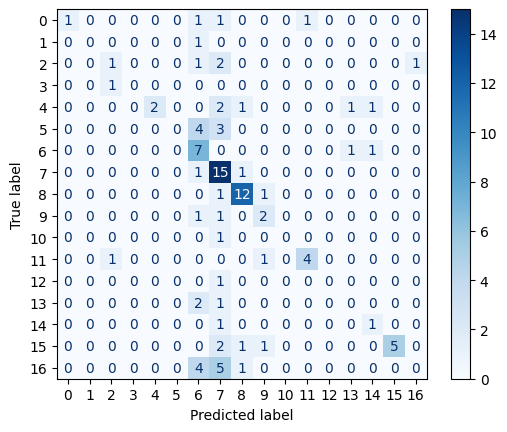

In [ ]:
y_pred = model.predict(x_test)
results_df.loc[len(results_df)] = ['NaiveBayesMultinomial', *calculate_scores_and_print_cm(y_test, y_pred)]

### Outros modelos NaiveBayes - sklearn

In [ ]:
%time
model_multinomial = MultinomialNB()
model_multinomial.fit(x_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


MultinomialNB()

MultinomialNaiveBayes accuracy: 0.49504950495049505
MultinomialNaiveBayes precision: 0.486933693369337
MultinomialNaiveBayes recall: 0.49504950495049505
MultinomialNaiveBayes f1 score: 0.4378044982134941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


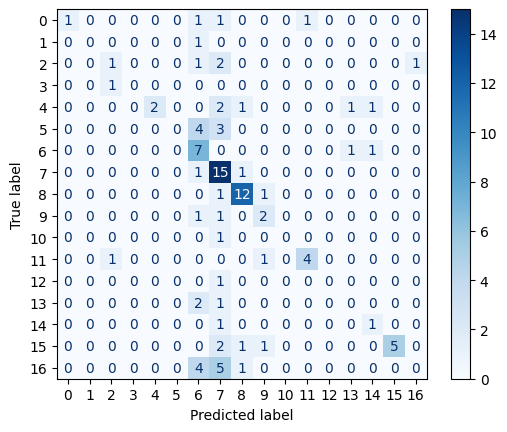

In [ ]:
y_pred_multinomial = model_multinomial.predict(x_test)
results_df.loc[len(results_df)] = ['MultinomialNB', *calculate_scores_and_print_cm(y_test, y_pred_multinomial)]

In [ ]:
%time
model_gaussian = GaussianNB()
model_gaussian.fit(x_train, y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.68 µs


GaussianNB()

MultinomialNaiveBayes accuracy: 0.5544554455445545
MultinomialNaiveBayes precision: 0.5439113142083439
MultinomialNaiveBayes recall: 0.5544554455445545
MultinomialNaiveBayes f1 score: 0.5345443552452411


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


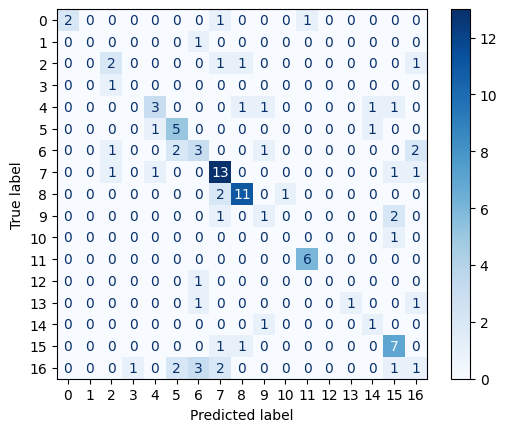

In [ ]:
y_pred_gaussian = model_gaussian.predict(x_test)
results_df.loc[len(results_df)] = ['GaussianNB', *calculate_scores_and_print_cm(y_test, y_pred_gaussian)]

In [ ]:
%time
model_complement = ComplementNB()
model_complement.fit(x_train, y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


ComplementNB()

MultinomialNaiveBayes accuracy: 0.5841584158415841
MultinomialNaiveBayes precision: 0.6009128293781759
MultinomialNaiveBayes recall: 0.5841584158415841
MultinomialNaiveBayes f1 score: 0.5543071480319688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


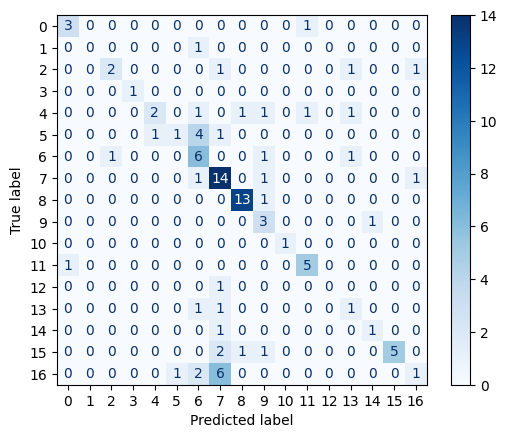

In [ ]:
y_pred_complement = model_complement.predict(x_test)
results_df.loc[len(results_df)] = ['ComplementNB', *calculate_scores_and_print_cm(y_test, y_pred_complement)]

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,NaiveBayesMultinomial,0.495050,0.486934,0.495050,0.437804
1,MultinomialNB,0.495050,0.486934,0.495050,0.437804
2,GaussianNB,0.554455,0.543911,0.554455,0.534544
3,ComplementNB,0.584158,0.600913,0.584158,0.554307


## Suporte para GPU

Para quesitos de comparação, foi feita uma implementação concorrente ao modelo `NaiveBayesMultinomial`, o `NaiveBayesMultinomialGPU` com a utilização da biblioteca CuPy ao invés de Numpy, que tem suporte para GPU (as células a seguir foram rodadas com uma máquina A100 -- para mais informações, checar a sessão seguinte do notebook):

In [ ]:
import cupy as cp
from collections import defaultdict, Counter
from typing import List, Dict, Tuple

class NaiveBayesMultinomialGPU:
    """
    Um classificador Naive Bayes Multinomial para classificação de texto ou outros dados discretos.
    """

    def __init__(self):
        """
        Inicializa o classificador Naive Bayes com variáveis para armazenar as contagens de classes,
        probabilidades a priori das classes, e probabilidades dos termos por classe.
        """
        self.cls_count = {}
        self.cls_priors = {}
        self.alpha = 1  # Parâmetro de suavização para evitar probabilidades zero
        self.vector_by_cls = defaultdict(list)
        self.terms_prob_by_cls = {}

    def fit(self, X: List[List[int]], y: List[str]) -> None:
        """
        Ajusta o modelo aos dados de treinamento.

        Args:
            X: Lista de listas de inteiros, onde cada lista interna representa uma amostra de entrada.
            y: Lista de strings, onde cada string é a classe correspondente à amostra em X.
        """
        self.cls_count = Counter(y)
        self._group_by_cls(X, y)
        self._calculate_cls_priors(y)
        self._calculate_terms_prob_by_cls()

    def _group_by_cls(self, X: List[List[int]], y: List[str]) -> None:
        """
        Agrupa os vetores de amostras por classe.

        Args:
            X: Lista de listas de inteiros, onde cada lista interna representa uma amostra de entrada.
            y: Lista de strings, onde cada string é a classe correspondente à amostra em X.
        """
        for sample, cls in zip(X, y):
            self.vector_by_cls[cls].append(sample)

    def _calculate_cls_priors(self, y: List[str]) -> Dict[str, float]:
        """
        Calcula as probabilidades a priori para cada classe com base nas frequências das classes no conjunto de dados.

        Args:
            y: Lista de strings, onde cada string é a classe correspondente à amostra em X.

        Returns:
            Um dicionário onde as chaves são as classes e os valores são as probabilidades a priori.
        """
        prior = {}
        total_samples = len(y)
        prior = {
            cls: count / total_samples for cls, count in self.cls_count.items()
        }
        self.cls_priors = prior

    def _calculate_terms_prob_by_cls(self) -> Tuple[float, float]:
        """
        Calcula a probabilidade de cada termo dado uma classe com suavização Laplaciana.

        Returns:
            Um dicionário onde as chaves são as classes e os valores são as probabilidades dos termos.
        """
        for cls, vectors in self.vector_by_cls.items():
            vectors = cp.array(vectors)  # Converte para CuPy array para GPU
            terms_count = cp.sum(vectors, axis=0)
            smoothed_tc = terms_count + self.alpha  # Suavização
            smoothed_total = cp.sum(smoothed_tc)
            self.terms_prob_by_cls[cls] = smoothed_tc / smoothed_total

    def _calculate_cls_scores(self, x: List[int]) -> Dict[str, float]:
        """
        Calcula as pontuações para cada classe para uma amostra dada.

        Args:
            x: Lista de inteiros representando a amostra de entrada.

        Returns:
            Um dicionário onde as chaves são as classes e os valores são as pontuações logarítmicas.
        """
        scores = {}
        x = cp.array(x)  # Converte a amostra para CuPy array
        for cls, prior in self.cls_priors.items():
            terms_prob = self.terms_prob_by_cls[cls]
            scores[cls] = cp.sum(cp.log(terms_prob) * x) + cp.log(prior)
        return scores

    def predict(self, X: List[List[int]]) -> List[str]:
        """
        Prediz a classe de cada amostra em X.

        Args:
            X: Lista de listas de inteiros, onde cada lista interna representa uma amostra de entrada.

        Returns:
            Uma lista de strings com as classes previstas para cada amostra.
        """
        predictions = []
        for sample in X:
            scores = self._calculate_cls_scores(sample)
            predictions.append(max(scores, key=scores.get))
        return predictions


In [ ]:
%time
modelGpu = NaiveBayesMultinomialGPU()
modelGpu.fit(x_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


MultinomialNaiveBayes accuracy: 0.49504950495049505
MultinomialNaiveBayes precision: 0.486933693369337
MultinomialNaiveBayes recall: 0.49504950495049505
MultinomialNaiveBayes f1 score: 0.4378044982134941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


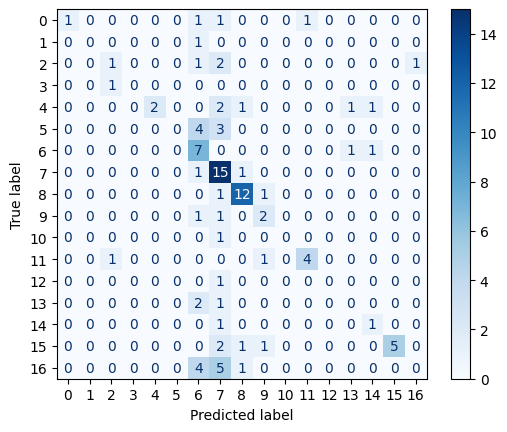

In [ ]:
y_pred_gpu = model.predict(x_test)
results_df.loc[len(results_df)] = ['NaiveBayesMultinomial', *calculate_scores_and_print_cm(y_test, y_pred_gpu)]

Reunindo os tempos de execução total (Wall time) de cada célula que treinou o modelo `NaiveBayesMultinomial`, temos, após **5 interações** com o notebook:

| Interação            | Modelo                | CPU     | GPU    |
| --------------------- | --------------------- | ------- | ------ |
| Interação 1          | NaiveBayesMultinomial | 9.76 µs | 6.3 µs |
| Interação 2          | NaiveBayesMultinomial | 9.80 µs | 6.1 µs |
| Interação 3          | NaiveBayesMultinomial | 9.79 µs | 6.2 µs |
| Interação 4          | NaiveBayesMultinomial | 9.75 µs | 6.4 µs |
| Interação 5          | NaiveBayesMultinomial | 9.81 µs | 6.2 µs |

Com os resultados de tempo de treinamento acima, podemos extrair alguma conclusões:

Com os resultados de tempo de treinamento apresentados, podemos extrair algumas conclusões importantes sobre o desempenho relativo entre a CPU e a GPU para esse tipo de tarefa. No caso de conjuntos de dados pequenos, como o utilizado no treinamento do modelo NaiveBayesMultinomial, a CPU tende a ser mais eficiente. Isso ocorre porque o processamento em CPU geralmente envolve menos overhead, ou seja, menos tempo gasto na preparação, transferência de dados, e outras operações auxiliares que não estão diretamente ligadas ao processamento do modelo. A CPU, com sua arquitetura otimizada para uma ampla variedade de operações e menor latência, pode processar tarefas menores de maneira mais direta e rápida, sem os custos adicionais associados ao uso de uma GPU.

Por outro lado, a GPU começa a demonstrar suas vantagens quando o volume de dados é substancialmente grande, tornando o processamento paralelo mais relevante. Embora a GPU possa introduzir um overhead significativo no início, relacionado à transferência de dados entre a memória principal e a memória da GPU, essa desvantagem é compensada à medida que o tamanho dos dados aumenta. Quando o volume de dados é grande o suficiente, a capacidade de processamento paralelo massivo da GPU permite que ela execute tarefas em menor tempo do que a CPU, tornando-se a opção mais eficiente. Em resumo, a escolha entre CPU e GPU deve ser guiada pelo tamanho e complexidade dos dados: CPUs são geralmente mais rápidas para tarefas pequenas, enquanto GPUs brilham em cenários que exigem processamento em larga escala.

## Instruções para execução com GPU

Após conectar o Notebook do Google Colab, segue as instruções para rodar com GPU:

- Verificação da GPU: Primeiro, verifique se a GPU estava ativada no ambiente Colab;

- Acesse: Ambiente de execução > Alterar tipo de ambiente de execução e selecione o tipo de GPU da sua preferência, como por exemplo T4 ou A100;

Após seguir esses passos, será necessário rodar todas as células novamente até a subsessão _Método auxiliar_, dentro da sessão _Treino e métricas_ e logo após rodar a sessão referente ao treino com CPU (_Suporte para GPU_).

> Atenção! Se as células _NaiveBayesMultinomial_ e _Outros modelos NaiveBayes - sklearn_ forem executadas utilizando GPU, os resultados de tempo de execução (denotador por `%time`) serão alterados

Os demais modelos implementados com a biblioteca Scikit-Learn não foram executados com GPU por não apresentarem suporte nativo para tal operação.

## Fontes
1. IBM. *Naive Bayes: Understanding Naive Bayes Classification*. IBM, 2023. Disponível em: <https://www.ibm.com/topics/naive-bayes>. Acesso em: 26 ago. 2024.
2. MANNING, C. D. et al. *An Introduction to Information Retrieval*. Cambridge: Cambridge University Press, 2009. Disponível em: <http://www.informationretrieval.org/>. Acesso em: 26 ago. 2024. Capítulo 13, Seção 13.2, p. 253.
